# Prerequisites

## Install Library

In [93]:
# for python 3.11.4
%pip install -r requirements.txt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Library

In [94]:
# Basic import
import pandas as pd
import numpy as np
import joblib
import os
import json
from datetime import datetime
import warnings

# Data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.model_selection import ParameterGrid, RandomizedSearchCV, ParameterSampler, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (recall_score, precision_score, f1_score, precision_recall_curve, auc, average_precision_score,
                            confusion_matrix, classification_report, roc_curve, roc_auc_score, cohen_kappa_score)
from xgboost import XGBClassifier
# from imblearn.combine import SMOTETomek
# from imblearn.pipeline import Pipeline as ImbPipeline

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
warnings.filterwarnings('ignore')

## Read Data

In [95]:
df = pd.read_csv("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/data/fraudTrain_cleaned.csv", index_col=0)

In [96]:
# Convert trans_date_trans_time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [97]:
df.head()

,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,state,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,514,4.97,Jennifer,Banks,0,561 Perry Cove,526,27,...,0,0,0,1,0,0,0,0,0,78.773821
1,2019-01-01 00:00:44,630423337322,241,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,612,47,...,0,0,0,0,0,0,0,0,0,30.216618
2,2019-01-01 00:00:51,38859492057661,390,220.11,Edward,Sanchez,1,594 White Dale Suite 530,468,13,...,0,0,0,0,0,0,0,0,0,108.102912
3,2019-01-01 00:01:16,3534093764340240,360,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,84,26,...,0,0,0,0,0,0,0,0,0,95.685115
4,2019-01-01 00:03:06,375534208663984,297,41.96,Tyler,Garcia,1,408 Bradley Rest,216,45,...,0,0,0,0,1,0,0,0,0,77.702395


In [98]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'age', 'hour', 'day', 'month', 'year', 'is_weekend',
       'is_weekday', 'time_diff', 'diff_days', 'diff_hours', 'diff_minutes',
       'diff_seconds', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'distance'],
      dtype='object')

In [99]:
df.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                            int64
amt                               float64
first                              object
last                               object
gender                              int64
street                             object
city                                int64
state                               int64
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                 int64
dob                                object
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
age                                 int64
hour                                int64
day                               

In [100]:
df.isnull().sum()

trans_date_trans_time      0
cc_num                     0
merchant                   0
amt                        0
first                      0
last                       0
gender                     0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
age                        0
hour                       0
day                        0
month                      0
year                       0
is_weekend                 0
is_weekday                 0
time_diff                  0
diff_days                  0
diff_hours                 0
diff_minutes               0
diff_seconds               0
category_entertainment     0
category_food_

In [101]:
df_all = df.copy()

# Time-based split
split_time = df_all['trans_date_trans_time'].quantile(0.8)
df_train = df_all[df_all['trans_date_trans_time'] < split_time]
df_test = df_all[df_all['trans_date_trans_time'] >= split_time]

split_time_val = df_train['trans_date_trans_time'].quantile(0.8)
df_train_final = df_train[df_train['trans_date_trans_time'] < split_time_val]
df_val = df_train[df_train['trans_date_trans_time'] >= split_time_val]

In [102]:
df_train_final.shape, df_val.shape, df_test.shape

((829872, 48), (207468, 48), (259335, 48))

In [103]:
print(f"df_train {df_train['is_fraud'].value_counts()}")
print(f"df_test {df_test['is_fraud'].value_counts()}")
print(f"df_val {df_val['is_fraud'].value_counts()}")

df_train is_fraud
0    1031372
1       5968
Name: count, dtype: int64
df_test is_fraud
0    257797
1      1538
Name: count, dtype: int64
df_val is_fraud
0    206297
1      1171
Name: count, dtype: int64


# Model Pipeline

## 1. Features

### 1.1 Split Features and Target

In [104]:
columns_to_exclude = ['first', 'last', 'street', 'trans_date_trans_time', 'dob', 'trans_num', 'is_fraud']

# Train
X_train = df_train_final.drop(columns_to_exclude, axis=1)
y_train = df_train_final["is_fraud"]

# Validation
X_val = df_val.drop(columns_to_exclude, axis=1)
y_val = df_val["is_fraud"]

# Test
X_test = df_test.drop(columns_to_exclude, axis=1)
y_test = df_test["is_fraud"]

### 1.2 Feature Scaling

In [105]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### 1.3 Feature Selection

In [106]:
# 1st: Select K Best (Find the 20 best features)
# Feature selection
selector = SelectKBest(score_func=f_classif, k=20)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_val_selected = selector.transform(X_val_scaled)
X_test_selected = selector.transform(X_test_scaled)

Result from SelectKBest

In [107]:
# List the selected features from SelectKBest
selected_features = selector.get_support(indices=True)
selected_feature_names = X_train.columns[selected_features]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['amt', 'gender', 'unix_time', 'age', 'hour', 'month', 'time_diff',
       'diff_days', 'diff_hours', 'diff_minutes', 'diff_seconds',
       'category_entertainment', 'category_food_dining',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_personal_care',
       'category_shopping_net'],
      dtype='object')


In [108]:
# 2nd: RFE (Recursive Feature Elimination)
from sklearn.ensemble import RandomForestClassifier
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10, step=1)
X_train_rfe = rfe.fit_transform(X_train_selected, y_train)
X_val_rfe = rfe.transform(X_val_selected)
X_test_rfe = rfe.transform(X_test_selected)

In [109]:
# Define the model pipeline for XGBoost
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select_kbest', SelectKBest(score_func=f_classif, k=20)),
    ('rfe', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)),
    ('xgboost', XGBClassifier(random_state=42,
        n_estimators=200,
        max_depth=7,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=172,
        eval_metric='logloss'))
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('select_kbest', SelectKBest(k=20)),
                ('rfe',
                 RFE(estimator=RandomForestClassifier(random_state=42),
                     n_features_to_select=10)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_cat...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

## 2. XGBoost

### 2.1 Find Best Parameters

#### GridSearch

In [112]:
# Define enhanced parameter grid for XGBoost
param_grid = {
    'xgboost__n_estimators': [200, 300],
    'xgboost__learning_rate': [0.05, 0.1],
    'xgboost__max_depth': [4, 8],
    'xgboost__subsample': [0.8, 0.9],
    'xgboost__colsample_bytree': [0.8, 0.9],
    'xgboost__scale_pos_weight': [172]
}

# Create enhanced pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select_kbest', SelectKBest(score_func=f_classif, k=20)),
    ('rfe', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10, step=1)),
    ('xgboost', XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        reg_alpha=0.1,
        reg_lambda=0.1
    ))
])

# GridSearchCV
print("Starting GridSearchCV...")
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best params from GridSearch:", best_params)
print("Best GridSearch F1 Score:", grid_search.best_score_)

Starting GridSearchCV...
Fitting 3 folds for each of 32 candidates, totalling 96 fits


Python(68755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68756) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [18] are constant.
  warnings.warn("Features %s are consta

Best params from GridSearch: {'xgboost__colsample_bytree': 0.9, 'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 8, 'xgboost__n_estimators': 200, 'xgboost__scale_pos_weight': 172, 'xgboost__subsample': 0.9}
Best GridSearch F1 Score: 0.43356322361679606


In [113]:
# Run GridSearchCV
print("GridSearchCV completed successfully!")
print("Best params from GridSearch:", best_params)
print("Best CV F1 Score:", grid_search.best_score_)

GridSearchCV completed successfully!
Best params from GridSearch: {'xgboost__colsample_bytree': 0.9, 'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 8, 'xgboost__n_estimators': 200, 'xgboost__scale_pos_weight': 172, 'xgboost__subsample': 0.9}
Best CV F1 Score: 0.43356322361679606


In [115]:
# Build the best pipeline with the best parameters and train with the full training set
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select_kbest', SelectKBest(score_func=f_classif, k=20)),
    ('rfe', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10, step=1)),
    ('xgboost', XGBClassifier(
        n_estimators=best_params['xgboost__n_estimators'],
        learning_rate=best_params['xgboost__learning_rate'],
        max_depth=best_params['xgboost__max_depth'],
        subsample=best_params.get('xgboost__subsample', 0.8),
        colsample_bytree=best_params.get('xgboost__colsample_bytree', 0.8),
        scale_pos_weight=best_params['xgboost__scale_pos_weight'],
        random_state=42,
        eval_metric='logloss',
        reg_alpha=0.1,
        reg_lambda=0.1
    ))
])

In [116]:
X_trainval = pd.concat([X_train, X_val], axis=0)
y_trainval = pd.concat([y_train, y_val], axis=0)
best_pipeline.fit(X_trainval, y_trainval)

Pipeline(steps=[('scaler', StandardScaler()),
                ('select_kbest', SelectKBest(k=20)),
                ('rfe',
                 RFE(estimator=RandomForestClassifier(random_state=42),
                     n_features_to_select=10)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.9, device=None,
                               early_stopping_rounds=None,
                               enable_cat...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [117]:
# --- Display GridSearch Results ---
print("Best GridSearch Parameters:", best_params)
print("Best GridSearch F1 Score:", grid_search.best_score_)

Best GridSearch Parameters: {'xgboost__colsample_bytree': 0.9, 'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 8, 'xgboost__n_estimators': 200, 'xgboost__scale_pos_weight': 172, 'xgboost__subsample': 0.9}
Best GridSearch F1 Score: 0.43356322361679606


In [118]:
# ตรวจสอบ data leakage และข้อมูลก่อนทำนาย
print("=== Data Inspection Before Prediction ===")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"X_test columns: {list(X_test.columns)}")

# ตรวจสอบว่ามี target variable ใน features หรือไม่
if 'is_fraud' in X_test.columns:
    print("❌ WARNING: Target variable 'is_fraud' found in features! This causes data leakage.")
    # ลบ target variable ออกจาก features
    X_test_clean = X_test.drop('is_fraud', axis=1)
    X_trainval_clean = X_trainval.drop('is_fraud', axis=1) if 'is_fraud' in X_trainval.columns else X_trainval
    print("Removing 'is_fraud' from features...")
else:
    print("✅ No target variable found in features.")
    X_test_clean = X_test
    X_trainval_clean = X_trainval

print(f"Cleaned X_test shape: {X_test_clean.shape}")
print(f"Cleaned features: {list(X_test_clean.columns)}")

=== Data Inspection Before Prediction ===
X_test shape: (259335, 41)
y_test shape: (259335,)
X_test columns: ['cc_num', 'merchant', 'amt', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month', 'year', 'is_weekend', 'is_weekday', 'time_diff', 'diff_days', 'diff_hours', 'diff_minutes', 'diff_seconds', 'category_entertainment', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'distance']
✅ No target variable found in features.
Cleaned X_test shape: (259335, 41)
Cleaned features: ['cc_num', 'merchant', 'amt', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month', 'year', 'is_w

### 2.2 Evaluate and Compare The Results

Classification Report

In [119]:
# ตรวจสอบการกระจายของ target
print(f"y_test distribution:")
print(y_test.value_counts())
print(f"Fraud percentage: {(y_test == 1).mean() * 100:.2f}%")

# ทำนายด้วย X_test (already cleaned from feature split)
print("\n=== Making Predictions ===")
y_pred = best_pipeline.predict(X_test)

# ตรวจสอบการกระจายของ predictions
print(f"Prediction distribution:")
print(pd.Series(y_pred).value_counts())

# แสดง Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

y_test distribution:
is_fraud
0    257797
1      1538
Name: count, dtype: int64
Fraud percentage: 0.59%

=== Making Predictions ===
Prediction distribution:
0    257143
1      2192
Name: count, dtype: int64

=== Classification Report ===
Prediction distribution:
0    257143
1      2192
Name: count, dtype: int64

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257797
           1       0.52      0.75      0.62      1538

    accuracy                           0.99    259335
   macro avg       0.76      0.87      0.81    259335
weighted avg       1.00      0.99      0.99    259335

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257797
           1       0.52      0.75      0.62      1538

    accuracy                           0.99    259335
   macro avg       0.76      0.87      0.81    259335
weighted avg       1.00      0.99      0.99    259335



Confusion Matrix

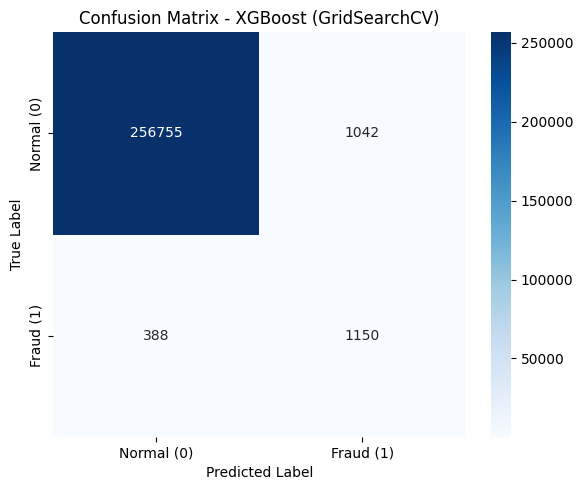

In [120]:
# Predicted values and true values for confusion matrix for GridSearch
y_true = y_test
y_pred_gridsearch = best_pipeline.predict(X_test)

# Build confusion matrix
cm_gridsearch = confusion_matrix(y_true, y_pred_gridsearch)
labels = ['Normal (0)', 'Fraud (1)']

# plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gridsearch, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix - XGBoost (GridSearchCV)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [121]:
metrics = {
    "Method": ["GridSearch"],
    "Precision": [precision_score(y_test, y_pred_gridsearch)],
    "Recall": [recall_score(y_test, y_pred_gridsearch)],
    "F1-Score": [f1_score(y_test, y_pred_gridsearch)],
    "ROC-AUC": [roc_auc_score(y_test, best_pipeline.predict_proba(X_test)[:, 1])],
    "Cohen Kappa": [cohen_kappa_score(y_test, y_pred_gridsearch)]
}

df_metrics = pd.DataFrame(metrics)
display(df_metrics)

,Method,Precision,Recall,F1-Score,ROC-AUC,Cohen Kappa
0,GridSearch,0.524635,0.747724,0.616622,0.987095,0.613931


ROC Curve

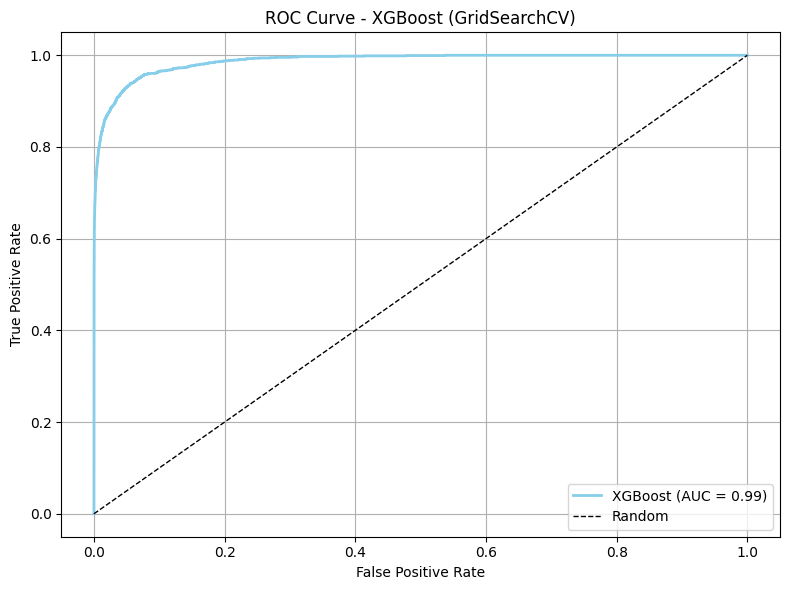

In [122]:
# --- Display ROC Curve ---
y_score = best_pipeline.predict_proba(X_test)[:, 1]

# Build ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='skyblue', lw=2, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (GridSearchCV)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Precision-Recall Curve

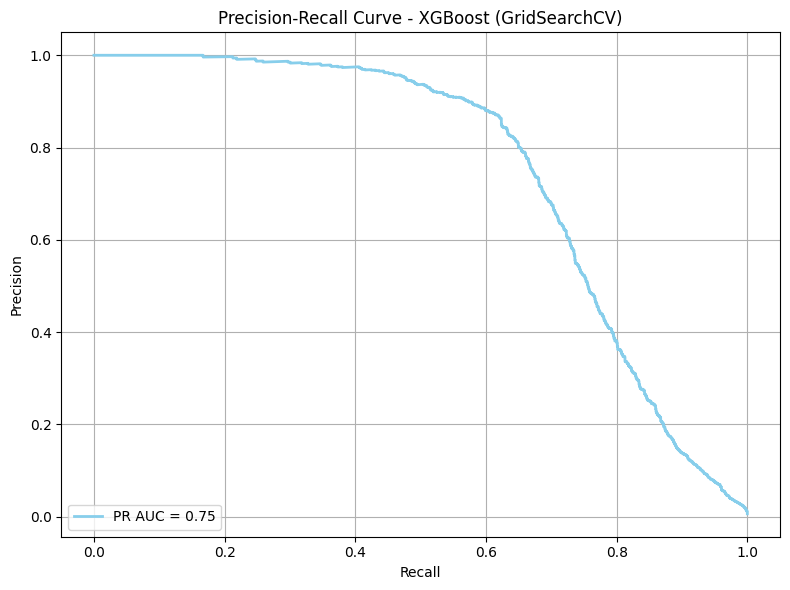

In [123]:
# --- Display Precision-Recall Curve ---
y_score = best_pipeline.predict_proba(X_test)[:, 1]

# สร้าง Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
pr_auc = average_precision_score(y_test, y_score)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='skyblue', lw=2, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost (GridSearchCV)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

Metrics Comparison

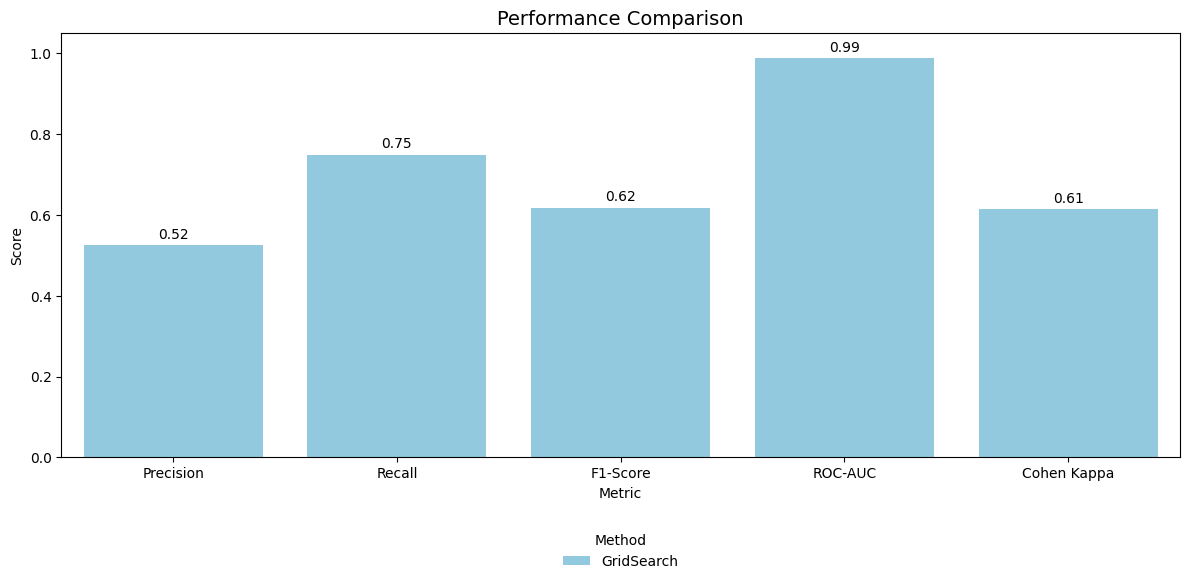

In [124]:
# --- Display Metrics Comparison ---
plt.figure(figsize=(12, 6))

df_melt = df_metrics.melt(id_vars="Method", var_name="Metric", value_name="Score")
ax = sns.barplot(data=df_melt, x="Metric", y="Score", hue="Method", palette=["skyblue"])

# Annotate the bars with their values
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.2f}',
            ha="center", va="bottom"
        )

plt.title("Performance Comparison", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(
    title="Method",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    frameon=False
)
plt.tight_layout()
plt.grid(False)
plt.show()

Overfitting Plot

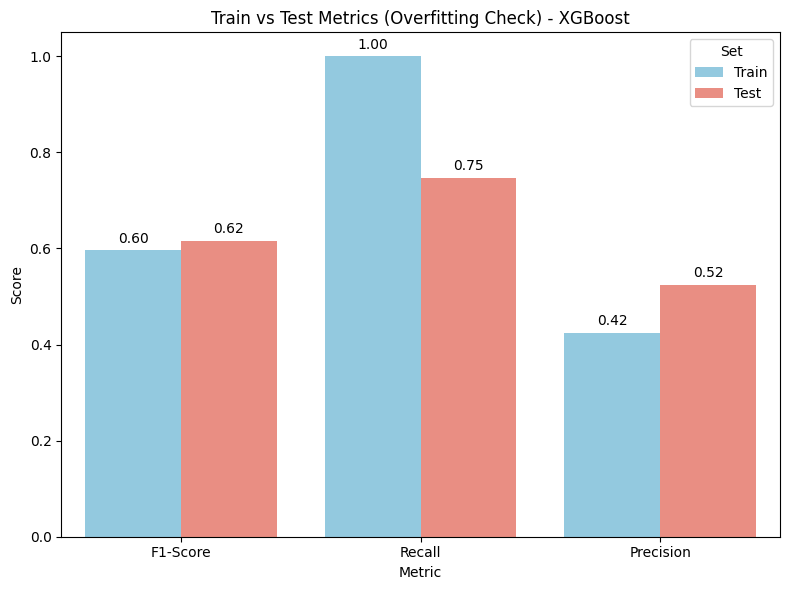

In [125]:
# --- Calculate metrics for train set ---
y_pred_train = best_pipeline.predict(X_trainval)
train_f1 = f1_score(y_trainval, y_pred_train)
train_recall = recall_score(y_trainval, y_pred_train)
train_precision = precision_score(y_trainval, y_pred_train)

# --- Calculate metrics for test set ---
y_pred_test = best_pipeline.predict(X_test)
test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)

# --- Prepare DataFrame for plotting ---
df_overfit = pd.DataFrame({
    "Metric": ["F1-Score", "Recall", "Precision"],
    "Train": [train_f1, train_recall, train_precision],
    "Test": [test_f1, test_recall, test_precision]
})

df_overfit = df_overfit.melt(id_vars="Metric", var_name="Set", value_name="Score")

# --- Plot ---
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_overfit, x="Metric", y="Score", hue="Set", palette=["skyblue", "salmon"])
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.2f}',
            ha="center", va="bottom"
        )
plt.title("Train vs Test Metrics (Overfitting Check) - XGBoost")
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.tight_layout()
plt.grid(False)
plt.show()

### 2.3 Save Model

In [ ]:
# 1. Save full pipeline with all preprocessing steps
full_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select_kbest', SelectKBest(score_func=f_classif, k=20)),
    ('rfe', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10, step=1)),
    ('xgboost', XGBClassifier(**{k.replace('xgboost__', ''): v for k, v in best_params.items() if k.startswith('xgboost__')}, random_state=42, eval_metric='logloss'))
])

# Prepare data for fitting
X = df_train.drop(['first', 'last', 'street', 'trans_date_trans_time', 'dob', 'trans_num', 'is_fraud'], axis=1)
y = df_train['is_fraud']

# Fit and save pipeline
full_pipeline.fit(X, y)
joblib.dump(full_pipeline, "xgboost_timebased.joblib")

# 2. Save best parameters
with open("params_XGBoost_fromGridSearch.json", "w") as f:
    json.dump(best_params, f)

# 3. Save model with parameters
save_dict = {
    "pipeline": full_pipeline,
    "params": best_params
}
joblib.dump(save_dict, "XGBoost_with_params.joblib")

['XGBoost_with_params.joblib']

# Model Testing

In [127]:
df = pd.read_csv("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/data/fraudTest_cleaned.csv", index_col=0)
loaded_pipeline = joblib.load("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/ml_training/single_sequential_version/models/Classification/xgboost_timebased.joblib")

In [128]:
# Random sample for testing
# sample_df = df.sample(n=50, random_state=42).copy()
sample_df = df.sample(100).copy()
X_sample = sample_df.drop(['first', 'last', 'street', 'trans_date_trans_time', 'dob', 'trans_num', 'dob', 'is_fraud'], axis=1)

In [129]:
predictions = loaded_pipeline.predict(X_sample)
predicted_result = predictions

In [130]:
# Calculate fraud probability
fraud_probability = loaded_pipeline.predict_proba(X_sample)[:, 1]

# Add predictions and fraud probability to sample_df
sample_df['predicted_result'] = predicted_result
sample_df['fraud_probability'] = fraud_probability

# Select columns to display
columns_to_show = [
    'trans_date_trans_time', 'trans_num', 'cc_num',  'first', 'last', 'merchant', 'amt',
    'is_fraud', 'predicted_result', 'fraud_probability'
]
display(sample_df[columns_to_show].reset_index(drop=True))

,trans_date_trans_time,trans_num,cc_num,first,last,merchant,amt,is_fraud,predicted_result,fraud_probability
0,2020-12-25 21:10:06,0328de7871d1db4c62bbcc67ee0545eb,2266735643685262,Carlos,Chung,425,6.83,0,0,0.203787
1,2020-12-03 08:01:07,a15575c577f9cda3d4abaab363bd5dd3,30044330818990,Allison,Ayala,206,43.26,0,0,0.144039
2,2020-11-29 22:00:38,274f51d6e1a58cf5921c98ee9163504a,3502088871723054,Scott,Martin,26,6.65,0,0,0.273696
3,2020-12-25 17:16:50,4e1bd2a3450dff28ef858296d36bcdfc,375974680629816,Roberta,Mccarthy,226,196.19,0,0,0.144039
4,2020-09-27 05:57:49,edd05dad204d1369697458938764b21f,3554849923339851,John,Hudson,619,43.69,0,0,0.144039
...,...,...,...,...,...,...,...,...,...,...
95,2020-09-30 10:18:14,6e0c932c64b630650eb2d366fd8c3199,4990494243023,Martin,Ford,549,47.49,0,0,0.144039
96,2020-12-29 22:20:46,4a89fd752554be44606aaa380e9debb1,4890424426862856940,Jeremy,Whitney,552,47.56,0,0,0.282412
97,2020-08-16 17:21:46,744833440fc3261139058577afcb3ce4,30143713661454,Nicholas,Thornton,178,21.94,0,0,0.267215
98,2020-07-07 06:35:16,29ac24bc99aaf2a80df0882f1cc52607,3597337756918966,Linda,Gonzalez,268,66.64,0,0,0.144039


In [131]:
# Filter and display only fraud transactions (is_fraud = 1)
fraud_transactions = sample_df[sample_df['is_fraud'] == 1].copy()

if len(fraud_transactions) > 0:
    print(f"Found {len(fraud_transactions)} fraud transactions in the sample:")
    print("\n=== Fraud Transactions Analysis ===")

    # Select columns to display for fraud transactions
    fraud_columns = [
        'trans_date_trans_time', 'trans_num', 'cc_num', 'first', 'last',
        'merchant', 'amt', 'is_fraud', 'predicted_result', 'fraud_probability'
    ]

    fraud_display = fraud_transactions[fraud_columns].reset_index(drop=True)
    display(fraud_display)

    # Show prediction accuracy for fraud transactions
    correct_predictions = fraud_transactions[fraud_transactions['predicted_result'] == 1]
    missed_predictions = fraud_transactions[fraud_transactions['predicted_result'] == 0]

    print(f"\n=== Fraud Detection Performance ===")
    print(f"Total fraud transactions: {len(fraud_transactions)}")
    print(f"Correctly detected: {len(correct_predictions)} ({len(correct_predictions)/len(fraud_transactions)*100:.1f}%)")
    print(f"Missed (False Negatives): {len(missed_predictions)} ({len(missed_predictions)/len(fraud_transactions)*100:.1f}%)")

    if len(missed_predictions) > 0:
        print(f"\n=== Missed Fraud Transactions ===")
        print("These fraud transactions were not detected by the model:")
        display(missed_predictions[fraud_columns].reset_index(drop=True))

else:
    print("No fraud transactions found in this sample. Try sampling again or increase sample size.")

Found 1 fraud transactions in the sample:

=== Fraud Transactions Analysis ===


,trans_date_trans_time,trans_num,cc_num,first,last,merchant,amt,is_fraud,predicted_result,fraud_probability
0,2020-08-25 22:43:14,09dc6e585ae74e1912df87aec3689b3a,4119762878330989,Melinda,Gutierrez,329,277.07,1,1,0.767653



=== Fraud Detection Performance ===
Total fraud transactions: 1
Correctly detected: 1 (100.0%)
Missed (False Negatives): 0 (0.0%)


=== Fraud Detection Performance Analysis ===

=== Train Dataset ===
Total fraud transactions (is_fraud = 1): 5968
Correctly detected fraud: 5968
Missed fraud (False Negatives): 0
Fraud detection rate: 100.0%

=== Train Dataset ===
Total fraud transactions (is_fraud = 1): 5968
Correctly detected fraud: 5968
Missed fraud (False Negatives): 0
Fraud detection rate: 100.0%

=== Test Dataset ===
Total fraud transactions (is_fraud = 1): 1538
Correctly detected fraud: 1150
Missed fraud (False Negatives): 388
Fraud detection rate: 74.8%

=== Summary Table ===
=== Test Dataset ===
Total fraud transactions (is_fraud = 1): 1538
Correctly detected fraud: 1150
Missed fraud (False Negatives): 388
Fraud detection rate: 74.8%

=== Summary Table ===


,Dataset,Total Fraud,Correctly Detected,Missed (False Negatives),Detection Rate (%)
0,Train,5968,5968,0,100.000000
1,Test,1538,1150,388,74.772432


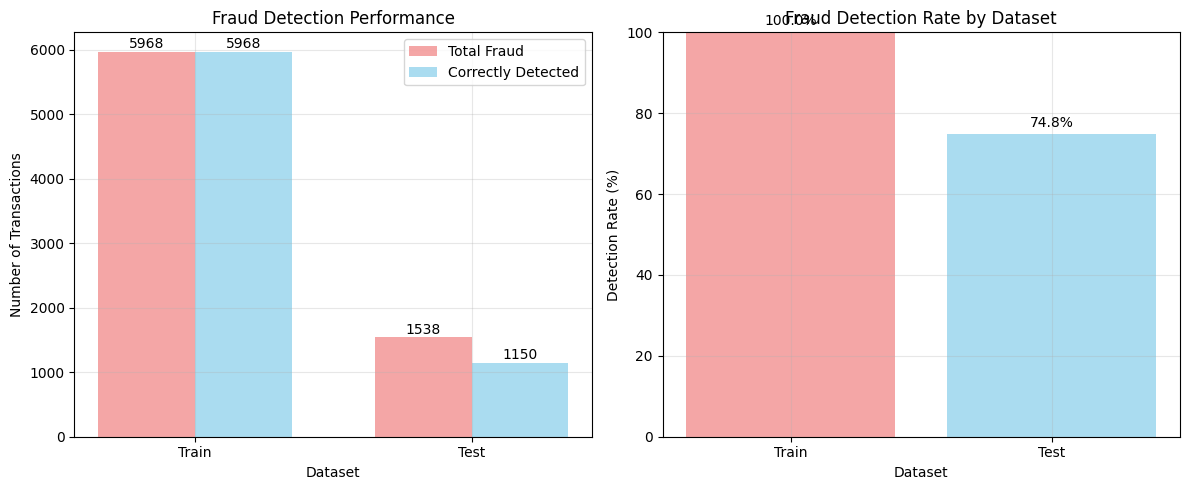

In [132]:
# Fraud Detection Performance Analysis across Train/Val/Test sets
print("=== Fraud Detection Performance Analysis ===\n")

# Prepare datasets for analysis
datasets = {
    'Train': (X_trainval, y_trainval),
    'Test': (X_test, y_test)
}

results = []

for dataset_name, (X_data, y_true) in datasets.items():
    # Get predictions
    y_pred = best_pipeline.predict(X_data)

    # Count fraud transactions
    total_fraud = (y_true == 1).sum()

    # Count correctly detected fraud (True Positives)
    correctly_detected = ((y_true == 1) & (y_pred == 1)).sum()

    # Count missed fraud (False Negatives)
    missed_fraud = ((y_true == 1) & (y_pred == 0)).sum()

    # Calculate detection rate
    detection_rate = correctly_detected / total_fraud * 100 if total_fraud > 0 else 0

    # Store results
    results.append({
        'Dataset': dataset_name,
        'Total Fraud': total_fraud,
        'Correctly Detected': correctly_detected,
        'Missed (False Negatives)': missed_fraud,
        'Detection Rate (%)': detection_rate
    })

    print(f"=== {dataset_name} Dataset ===")
    print(f"Total fraud transactions (is_fraud = 1): {total_fraud}")
    print(f"Correctly detected fraud: {correctly_detected}")
    print(f"Missed fraud (False Negatives): {missed_fraud}")
    print(f"Fraud detection rate: {detection_rate:.1f}%")
    print()

# Create summary DataFrame
df_fraud_performance = pd.DataFrame(results)
print("=== Summary Table ===")
display(df_fraud_performance)

# Visualize the results
plt.figure(figsize=(12, 5))

# Plot 1: Total vs Detected
plt.subplot(1, 2, 1)
x_pos = range(len(df_fraud_performance))
width = 0.35

plt.bar([x - width/2 for x in x_pos], df_fraud_performance['Total Fraud'],
        width, label='Total Fraud', color='lightcoral', alpha=0.7)
plt.bar([x + width/2 for x in x_pos], df_fraud_performance['Correctly Detected'],
        width, label='Correctly Detected', color='skyblue', alpha=0.7)

plt.xlabel('Dataset')
plt.ylabel('Number of Transactions')
plt.title('Fraud Detection Performance')
plt.xticks(x_pos, df_fraud_performance['Dataset'])
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, (total, detected) in enumerate(zip(df_fraud_performance['Total Fraud'],
                                         df_fraud_performance['Correctly Detected'])):
    plt.text(i - width/2, total + 10, str(total), ha='center', va='bottom')
    plt.text(i + width/2, detected + 10, str(detected), ha='center', va='bottom')

# Plot 2: Detection Rate
plt.subplot(1, 2, 2)
bars = plt.bar(df_fraud_performance['Dataset'], df_fraud_performance['Detection Rate (%)'],
               color=['lightcoral', 'skyblue'], alpha=0.7)
plt.xlabel('Dataset')
plt.ylabel('Detection Rate (%)')
plt.title('Fraud Detection Rate by Dataset')
plt.ylim(0, 100)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, rate in zip(bars, df_fraud_performance['Detection Rate (%)']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{rate:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()